In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import unidecode, re
from sklearn.pipeline import make_pipeline
# ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils'
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTENC, SMOTEN, ADASYN
from scipy import *
from sklearn.feature_selection import SelectKBest, f_regression
from catboost import CatBoostClassifier, Pool, cv
import lightgbm as lgb
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from pycaret.classification import *
my_font = dict(
            family="Courier New, monospace",
            size=18,
            color="Black",
            variant="small-caps",
) 
df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [4]:
# df.groupby('SG_UF').size().reset_index(name='count').sort_values(by='count', ascending=False)

In [5]:
# px.histogram(
#     df.groupby(['SG_UF','OBESIDADE']).size().reset_index(name='count').sort_values(by='count', ascending=False),
#     x='SG_UF',
#     y='count',
#     color='SG_UF')


In [6]:

# x = df.groupby('GARGANTA').size().reset_index(name='count').sort_values(by='count', ascending=False)

# px.histogram(
#      x,
#      x='GARGANTA',
#      y='count',
#      color='GARGANTA')
# x

In [7]:
# px.histogram(
#     df.groupby(['SG_UF','CS_SEXO']).size().reset_index(name='count').sort_values(by='count', ascending=False),
#     x='SG_UF',
#     y='count',
#     color='SG_UF')

In [8]:
# X_train = df.select_dtypes(['number']).drop(columns=['EVOLUCAO'])
# y_train = df['EVOLUCAO']

# X_test_sub = df_test.select_dtypes(['number'])

In [9]:
# X_train, X_test, y_train, y_test= train_test_split(X_train, y_train, test_size = .1, random_state=2)


In [10]:
# catb = CatBoostClassifier(
#     iterations=100,      
#     learning_rate=0.1,   
#     depth=6,              
#     verbose=0             
# )

# catb.fit(X_train, y_train)

# preds = catb.predict(X_test)

In [11]:
# catboost_accuracy = accuracy_score(y_test, preds)
# print(f"CatBoost's acurracy: {catboost_accuracy*100:.2f}%")

# print("\nClassification report")
# print(classification_report(y_test, preds))

# cm = confusion_matrix(y_test, preds)
# fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "CatBoost's Confusion Matrix"}, font=my_font).show()


In [12]:
# test_pred = catb.predict_proba(X_test_sub)[:,1] # chances of death, class: 1.0

# pd.DataFrame(np.round(test_pred)).reset_index().to_csv('results/submission_catboost.csv', header=['ID', 'EVOLUCAO'], index=False)

In [13]:
# lightGBM = lgb.LGBMClassifier(random_state=23)

# lightGBM.fit(X_train, y_train)

# preds = lightGBM.predict(X_test)

In [14]:
# accuracy = lightGBM.score(X_test, y_test)


# print(f"LightGBM acurracy: {accuracy*100:.2f}%")
# print("\nClassification report")
# print(classification_report(y_test, preds))

# cm = confusion_matrix(y_test, preds)
# fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "LightGBM's Confusion Matrix"}, font=my_font).show()


In [15]:
# test_pred = lightGBM.predict_proba(X_test_sub)[:,1] # chances of death, class: 1.0

# pd.DataFrame(np.round(test_pred)).reset_index().to_csv('results/submission_light_gbm.csv', header=['ID', 'EVOLUCAO'], index=False)

In [16]:
# rf = RandomForestClassifier()

# rf.fit(X_train, y_train)

In [17]:
# preds = rf.predict(X_test)
# accuracy = rf.score(X_test, y_test)

# print(f"Accuracy: {accuracy*100:.2f}")
# print("\nClassification report")
# print(classification_report(y_test, preds))

# cm = confusion_matrix(y_test, preds)
# fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "Random Forest's Confusion Matrix"}, font=my_font).show()



In [18]:
# xg = XGBClassifier()
# xg.fit(X_train, y_train)
# preds = xg.predict(X_test)


In [19]:
# accuracy = xg.score(X_test, y_test)

# print(f"Accuracy: {accuracy*100:.2f}")
# print("\nClassification report")
# print(classification_report(y_test, preds))

# cm = confusion_matrix(y_test, preds)
# fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "XGBoost's Confusion Matrix"}, font=my_font).show()


In [20]:
# test_pred = xg.predict_proba(X_test_sub)[:,1] # chances of death, class: 1.0

# pd.DataFrame(np.round(test_pred)).reset_index().to_csv('submission_xg.csv', header=['ID', 'EVOLUCAO'], index=False)

# Now we can try to treat this dataset
- Let us start by checking what columns have more missing values
- Then we can drop rows with more that 90% of the data NaN

In [21]:
# px.histogram(df.isna().sum().reset_index(name='count').sort_values(by='count', ascending=False),
#             x='index', y='count', color='count', color_discrete_sequence= px.colors.sequential.Plasma_r,
#              title="Most frequent columns with missing values").update_layout(font = my_font)

In [22]:
# x = df.isna().sum().reset_index(name='count').sort_values(by='count', ascending=False)
# x['pecentage_of_missing_data'] = (x['count'] / len(df))*100
# x

In [23]:
# px.histogram(df.isna().sum().reset_index(name='count').sort_values(by='count', ascending=True).head(20),
#             x='index', y='count', color='count', color_discrete_sequence= px.colors.sequential.Plasma_r,
#              title="Less frequent columns with missing values").update_layout(font = my_font)

In [3]:
missing_counts = df.isnull().sum(axis=1)
thresh = 23
df_no_nulls = df[missing_counts < thresh]
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495772 entries, 0 to 498319
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DT_NOTIFIC  495772 non-null  object 
 1   CS_SEXO     495772 non-null  object 
 2   CO_RG_RESI  423724 non-null  float64
 3   ID_MN_RESI  495729 non-null  object 
 4   CS_ZONA     444976 non-null  float64
 5   NU_IDADE_N  495772 non-null  int64  
 6   CS_ESCOL_N  351267 non-null  float64
 7   CS_RACA     477107 non-null  float64
 8   SG_UF       495729 non-null  object 
 9   CS_GESTANT  495772 non-null  int64  
 10  PUERPERA    199555 non-null  float64
 11  DIABETES    245926 non-null  float64
 12  PNEUMOPATI  205916 non-null  float64
 13  IMUNODEPRE  202774 non-null  float64
 14  RENAL       205586 non-null  float64
 15  OBESIDADE   207458 non-null  float64
 16  OBES_IMC    14525 non-null   float64
 17  CARDIOPATI  262135 non-null  float64
 18  SIND_DOWN   200235 non-null  float64
 19  HEPATIC

### Note: You cannot just filter out all columns with ANY missing values
 - The accuracy of all models pretty much drops drastically

### Checking correlation between variables

In [15]:
# plt.figure(figsize=(12, 12))
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".1f")

## Frist, we can create a total_comorbities columns to represent the total amount of comordities one has.
    - We will separate it in chronic and temporary

In [4]:
df_no_nulls['total_chronic_cormodity'] = ((df_no_nulls[["OBESIDADE", 
                                                        "RENAL", 
                                                        "CARDIOPATI",
                                                        "IMUNODEPRE", 
                                                        "DIABETES", 
                                                        "PNEUMOPATI",
                                                        "HEPATICA",
                                                        "SIND_DOWN"]] == 1.0).sum(axis=1))

df_no_nulls['total_temporary_cormodity'] = (df_no_nulls[["FEBRE",
                                                        "TOSSE",
                                                        "PUERPERA",
                                                        "GARGANTA",
                                                        "DESC_RESP",
                                                        "DIARREIA",
                                                        "VOMITO",
                                                        "FADIGA",
                                                        "SATURACAO",
                                                        "DISPNEIA"]]== 1.0).sum(axis=1)

# Creating a function to handle missing values

In [5]:
class DataPreprocessor:
    def __init__(self, dataframe):
        self.df = dataframe.copy()
    
    def fill_rows_with_ints(self, columns_to_fill, missing_value=0):
        for col in columns_to_fill:
            if col in self.df.columns:
                self.df[col] = self.df[col].fillna(missing_value)
                self.df[col] = self.df[col].astype(int)
        return self.df
    
    def fill_null_rows(self, columns_to_fill, missing_value):
        for col in columns_to_fill:
            if col in self.df.columns:
                self.df[col] = self.df[col].fillna(missing_value)
                self.df[col] = self.df[col].astype(str)

        return self.df

In [6]:
# Filling nulls with 9 and converting everything to category

preprocessor = DataPreprocessor(df_no_nulls)
preprocessor_test = DataPreprocessor(df_test)

columns_to_fill = df_no_nulls.select_dtypes(['float']).columns.tolist()

processed_df = preprocessor.fill_rows_with_ints(columns_to_fill, missing_value=9)
processed_df_test = preprocessor_test.fill_rows_with_ints(columns_to_fill, missing_value=9)

In [7]:
columns_to_fill = [
                   "OBESIDADE", 
                   "RENAL", 
                   "CARDIOPATI",
                   "IMUNODEPRE", 
                   "DIABETES", 
                   "PNEUMOPATI",
                   "HEPATICA",
                   "FEBRE",
                   "TOSSE",
                   "GARGANTA",
                   "DESC_RESP",
                   "DIARREIA",
                   "VOMITO",
                   "FADIGA",
                   "SATURACAO",
                   "DISPNEIA",
                   "CS_RACA",
                   "CS_ZONA",
                   "VACINA",
                   "CS_ESCOL_N",
                   "FATOR_RISC",
                   "SIND_DOWN",
                   "CO_RG_RESI",
                   "PUERPERA",
                   "CS_SEXO",
                   "SG_UF",
                   "EVOLUCAO",
                   "CS_GESTANT"
                  ] # 22 columns 

preprocessor = DataPreprocessor(processed_df)
preprocessor_test = DataPreprocessor(processed_df_test)

df_2 = preprocessor.fill_null_rows(columns_to_fill, 9)


df_test_copy = preprocessor_test.fill_null_rows(columns_to_fill, 9)

df_2.drop(columns={"DT_NOTIFIC", "ID_MN_RESI","OBES_IMC", "CO_RG_RESI", "TOSSE"}, inplace=True)
df_test_copy.drop(columns={"DT_NOTIFIC", "ID_MN_RESI","OBES_IMC", "CO_RG_RESI", "TOSSE"}, inplace=True)


X = df_2.drop(columns={'EVOLUCAO'})
y = df_2['EVOLUCAO']

## Since we got an imbalanced dataset, let us oversample it with SMOTE and ADASYN

In [8]:
# y = pd.DataFrame(y)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.1, random_state=32)
# Note: 0.25 * 0.8 = 0.20, so overall 60/20/20

In [9]:
X_small, _, y_small, _ = train_test_split(
    X, y, 
    train_size=0.3,  # use 15% of data
    stratify=y,      # keep class balance
    random_state=42
)

print(X_small.shape, y_small.shape)

(148731, 28) (148731,)


In [10]:
cat_feats = [X.columns.get_loc(c) for c in X.select_dtypes(['object']).columns]

In [11]:
from collections import Counter
sm = SMOTENC(random_state=32, categorical_features=cat_feats)
X_resample, y_resample = sm.fit_resample (X_small, y_small)


print("Before:", Counter(y_small))
print("After:", Counter(y_resample))

Before: Counter({'0': 97495, '1': 51236})
After: Counter({'0': 97495, '1': 97495})


In [12]:

for col in X.select_dtypes(['object']).columns:
    X[col] = X[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')
    X_test[col] = X_test[col].astype('category')
    X_resample[col] = X_resample[col].astype('category')
   


cat_features = [X.columns.get_loc(c) for c in X.select_dtypes(['category']).columns]

params = {
    'n_estimators': 150,          # equivalent to iterations
    'learning_rate': 0.05,
    'max_depth': 7,
    'random_state': 32,
    'extra_trees': True,
    'metric': 'binary_logloss',
    'min_data_in_leaf': 1000,
    'num_leaves': 30,
    'colsample_bytree': 0.7,       # similar to rsm
    'reg_alpha': 0.1,
    'reg_lambda': 6,               # L2 regularization
    'bagging_fraction': 0.7,       # subsample ratio (use with bagging_freq)
    'bagging_freq': 1,
    'metric': 'TotalF1',     # default eval metric
    'verbose': -1,
    'lambda_l1': 1.0,
    #'early_stopping_rounds':10,
    'verbose': -1

}

lgbm = lgb.LGBMClassifier(**params)

# Fit model
lgbm.fit(
    X_resample, y_resample,
    eval_set=[(X_valid, y_valid)],
    eval_names=['validation'],
    eval_metric='binary_logloss'
    # categorical_feature=cat_features,
    # callbacks=[
    #     lgb.early_stopping(stopping_rounds=50),
    #     lgb.log_evaluation(period=50)
    # ]
)

# Prediction

# y_test = y_test.astype('category')
# y_valid = y_valid.astype('category')
# preds = lgbm.predict(X_valid)

# accuracy = lgbm.score(X_valid, y_valid)


# print(f"ctb acurracy: {accuracy*100:.2f}%")
# print("\nClassification report")
# print(classification_report(y_valid, preds))

# cm = confusion_matrix(y_valid, preds)
# fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "CatBoost's Confusion Matrix"}, font=my_font).show()


LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, colsample_bytree=0.7,
               extra_trees=True, lambda_l1=1.0, learning_rate=0.05, max_depth=7,
               metric='TotalF1', min_data_in_leaf=1000, n_estimators=150,
               num_leaves=30, random_state=32, reg_alpha=0.1, reg_lambda=6,
               verbose=-1)

In [14]:
# Ordinal Encoding my features
from sklearn.preprocessing import OrdinalEncoder
cat_cols_x = X.select_dtypes(include=["object", "category"]).columns
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
encoded_X = X.copy()
encoded_X[cat_cols_x] = encoder.fit_transform(encoded_X[cat_cols_x])




# y = pd.DataFrame(y)
X_temp, X_test, y_temp, y_test = train_test_split(encoded_X, numeric_y, test_size=0.1, random_state=32)

X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.1, random_state=32)
# Note: 0.25 * 0.8 = 0.20, so overall 60/20/20


X_small, _, y_small, _ = train_test_split(
    encoded_X, y, 
    train_size=0.3,  # use 15% of data
    stratify=y,      # keep class balance
    random_state=32
)

print(X_small.shape, y_small.shape)


from collections import Counter
adasyn = ADASYN(random_state=32)

X_resample, y_resample = adasyn.fit_resample (X_small, y_small)


print("Before:", Counter(y_small))
print("After:", Counter(y_resample))

(148731, 28) (148731,)
Before: Counter({'0': 97495, '1': 51236})
After: Counter({'0': 97495, '1': 95189})


In [ ]:
from sklearn.ensemble import StackingClassifier
params_lgb = {
    'n_estimators': 150,
    'learning_rate': 0.05,
    'max_depth': 7,
    'random_state': 32,
    'num_leaves': 30,
    'colsample_bytree': 0.7,
    'reg_alpha': 0.1,
    'reg_lambda': 6,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'verbose': -1
}
lgbm = lgb.LGBMClassifier(**params_lgb)

# CatBoost
params_cat = {
    'iterations': 1000,
    'learning_rate': 0.05,
    'depth': 6,
    'loss_function': 'Logloss',   # binary classification
    'eval_metric': 'F1',          # for monitoring
    'random_seed': 32,
    'early_stopping_rounds': 20,
    'verbose': 50,
    #'logging_level': 'Silent'     # disables _CURRENT_EXPERIMENT error
}
ctb = CatBoostClassifier(**params_cat)

# XGBoost (optional)
xgb = XGBClassifier( eval_metric='logloss')

# -----------------------------
# Step 3: Create stacking ensemble
# -----------------------------
estimators = [
    ('lgb', lgbm),
    ('cat', ctb),
    ('xgb', xgb)
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator= CatBoostClassifier(n_estimators=100, random_state=32),
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# -----------------------------
# Step 4: Fit ensemble
# -----------------------------
stack.fit(X_resample, y_resample)

# -----------------------------
# Step 5: Evaluate
# -----------------------------
y_pred = stack.predict(X_test)
y_pred = y_pred.astype(int)  # converts strings like '0', '1' to integers 0, 1

print("\nClassification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(cm)

In [107]:
# # LightGBM uses integer column indices for categorical features
# cat_features = [X.columns.get_loc(c) for c in X.select_dtypes(['object']).columns]

# params = {
#     'n_estimators': 150,          # equivalent to iterations
#     'learning_rate': 0.05,
#     'max_depth': 7,
#     'random_state': 32,
#     'extra_trees': True,
#     'metric': 'binary_logloss',
#     'min_data_in_leaf': 1000,
#     'num_leaves': 30,
#     'colsample_bytree': 0.7,       # similar to rsm
#     'reg_alpha': 0.1,
#     'reg_lambda': 6,               # L2 regularization
#     'bagging_fraction': 0.7,       # subsample ratio (use with bagging_freq)
#     'bagging_freq': 1,
#     'metric': 'TotalF1',     # default eval metric
#     'verbose': -1,
#     'lambda_l1': 1.0,
#    #'early_stopping_rounds':10,
#     'verbose': -1

# }

# lgbm = lgb.LGBMClassifier(**params)

# # Fit model
# lgbm.fit(
#     X_train, y_train,
#     eval_set=[(X_valid, y_valid)],
#     eval_names=['validation'],
#     eval_metric='binary_logloss',
#     #categorical_feature=cat_features,
#     # callbacks=[
#     #     lgb.early_stopping(stopping_rounds=50),
#     #     lgb.log_evaluation(period=50)
#     # ]
# )

# # Prediction
# y_pred = lgbm.predict_proba(X_valid)[:, 1]  # prob for class 1
# print("Validation AUC:", roc_auc_score(y_valid, y_pred))



In [108]:
# import shap

# SHAP analysis
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns, plot_type="bar")
shap_importance = np.abs(shap_values).mean(axis=0)

# put into DataFrame for readability
shap_importance_df = pd.DataFrame({
    "feature": X_test.columns,
    "importance": shap_importance
}).sort_values(by="importance", ascending=True)

print(shap_importance_df.head(10))   # lowest 10 features
# Drop low-impact features
# low_impact_features = [...]  # your list
# X_train_reduced = X_train.drop(columns=low_impact_features)
# X_valid_reduced = X_valid.drop(columns=low_impact_features)

# # # Update categorical feature indices
# # cat_features_reduced = [X_train_reduced.columns.get_loc(f) for f in cat_features if f not in low_impact_features]

# # # Create LightGBM datasets
# # train_data = lgb.Dataset(X_train_reduced, label=y_train, categorical_feature=cat_features_reduced)
# # valid_data = lgb.Dataset(X_valid_reduced, label=y_valid, categorical_feature=cat_features_reduced, reference=train_data)

# # # Train LightGBM
# # model = lgb.train(
# #     params,
# #     train_data,
# #     valid_sets=[train_data, valid_data],
# #     valid_names=["train", "valid"],
# #     num_boost_round=2000,
# #     early_stopping_rounds=100
# # )
# # y_pred = model.predict_proba(X_valid)[:, 1]  # prob for class 1
# # print("Validation AUC:", roc_auc_score(y_valid, y_pred))


### Now we will drop out unimportant feaures like SIND_DOWN    0.002544
###                 PUERPERA    0.005949
###                     CS_ZONA    0.007252

In [109]:
# df_2.drop(columns={"SIND_DOWN", "PUERPERA", "VOMITO","HEPATICA"}, inplace=True)
# df_test_copy.drop(columns={"SIND_DOWN", "PUERPERA", "VOMITO","HEPATICA"}, inplace=True)


# X = df_2.drop(columns={'EVOLUCAO'})
# y = df_2['EVOLUCAO']

# X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

# X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.19, random_state=32)
# # Note: 0.25 * 0.8 = 0.20, so overall 60/20/20



# lgbm.fit(
#     X_train, y_train,
#     eval_set=[(X_valid, y_valid)],
#     eval_names=['validation'],
#     eval_metric='binary_logloss'
#     # categorical_feature=cat_features,
#     # callbacks=[
#     #     lgb.early_stopping(stopping_rounds=50),
#     #     lgb.log_evaluation(period=50)
#     # ]
# )

# # Prediction
# y_pred = lgbm.predict_proba(X_valid)[:, 1]  # prob for class 1
# print("Validation AUC:", roc_auc_score(y_valid, y_pred))

In [58]:
column_index = X_train.columns.get_loc('DESC_RESP')
column_index

14

In [38]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44620 entries, 199642 to 129065
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CS_SEXO                    44620 non-null  category
 1   CS_ZONA                    44620 non-null  category
 2   NU_IDADE_N                 44620 non-null  int64   
 3   CS_ESCOL_N                 44620 non-null  category
 4   CS_RACA                    44620 non-null  category
 5   SG_UF                      44620 non-null  category
 6   CS_GESTANT                 44620 non-null  category
 7   DIABETES                   44620 non-null  category
 8   PNEUMOPATI                 44620 non-null  category
 9   IMUNODEPRE                 44620 non-null  category
 10  RENAL                      44620 non-null  category
 11  OBESIDADE                  44620 non-null  category
 12  CARDIOPATI                 44620 non-null  category
 13  FATOR_RISC                 446

In [55]:
X_train.drop(columns={'DIABETES', 'OBESIDADE'},  inplace=True)
X_valid.drop(columns={'DIABETES', 'OBESIDADE'}, inplace=True)

In [61]:
cat_features = X_valid.select_dtypes(['category']).columns.tolist()
params = {
    'iterations':1000,
    'learning_rate':0.03,
    'depth':9,
    'eval_metric':'TotalF1',
    'random_seed':32,
    'rsm': 0.5,
    'early_stopping_rounds': 20,
    'verbose': 50,
    'loss_function': 'Logloss',
    'use_best_model': True,
    'l2_leaf_reg': 3,      # default 3, increase to reduce overfit
    'random_strength': .2,  # adds noise to splits
    'bagging_temperature': .6,
    'nan_mode': 'Max',
    'per_float_feature_quantization': ['17:border_count=1024', '14:border_count=1024']
   #  'num_leaves': 50
}
ctb = CatBoostClassifier(
  **params
)

ctb.fit(
    X_train, y_train,
    eval_set=(X_valid, y_valid),
    cat_features=cat_features,
)

y_pred = ctb.predict_proba(X_valid)[:, 1]
print("Validation AUC:", roc_auc_score(y_valid, y_pred))

0:	learn: 0.6912704	test: 0.6857766	best: 0.6857766 (0)	total: 214ms	remaining: 3m 33s
50:	learn: 0.7196068	test: 0.7152400	best: 0.7152400 (50)	total: 9.56s	remaining: 2m 57s
100:	learn: 0.7264831	test: 0.7222633	best: 0.7222633 (100)	total: 19.4s	remaining: 2m 52s
150:	learn: 0.7306272	test: 0.7262867	best: 0.7263321 (149)	total: 29.6s	remaining: 2m 46s
200:	learn: 0.7341932	test: 0.7286588	best: 0.7287226 (193)	total: 39.8s	remaining: 2m 38s
250:	learn: 0.7364269	test: 0.7301668	best: 0.7302199 (233)	total: 50.3s	remaining: 2m 30s
300:	learn: 0.7382176	test: 0.7311401	best: 0.7312592 (294)	total: 1m	remaining: 2m 21s
350:	learn: 0.7400622	test: 0.7323889	best: 0.7323889 (350)	total: 1m 12s	remaining: 2m 13s
400:	learn: 0.7415816	test: 0.7333854	best: 0.7333854 (400)	total: 1m 22s	remaining: 2m 3s
450:	learn: 0.7426936	test: 0.7338335	best: 0.7339852 (448)	total: 1m 33s	remaining: 1m 54s
500:	learn: 0.7437267	test: 0.7342023	best: 0.7342023 (500)	total: 1m 44s	remaining: 1m 44s
Stopp

WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic fa


Top Features by Importance (PredictionValuesChange):
                      Feature  Importance
2                  NU_IDADE_N   26.525375
5                       SG_UF   16.745824
3                  CS_ESCOL_N    6.555103
19                  SATURACAO    6.180704
13                 FATOR_RISC    5.396437
16                  DESC_RESP    5.137411
21                     VACINA    4.585643
23  total_temporary_cormodity    4.327359
20                   DISPNEIA    3.498576
4                     CS_RACA    3.176641
22    total_chronic_cormodity    2.970947
18                     FADIGA    2.652218
0                     CS_SEXO    1.831729
10                      RENAL    1.680770
17                   DIARREIA    1.605011
9                  IMUNODEPRE    1.229116
14                      FEBRE    1.216264
15                   GARGANTA    1.111687
12                 CARDIOPATI    1.040017
6                  CS_GESTANT    0.736595
8                  PNEUMOPATI    0.644423
1                     

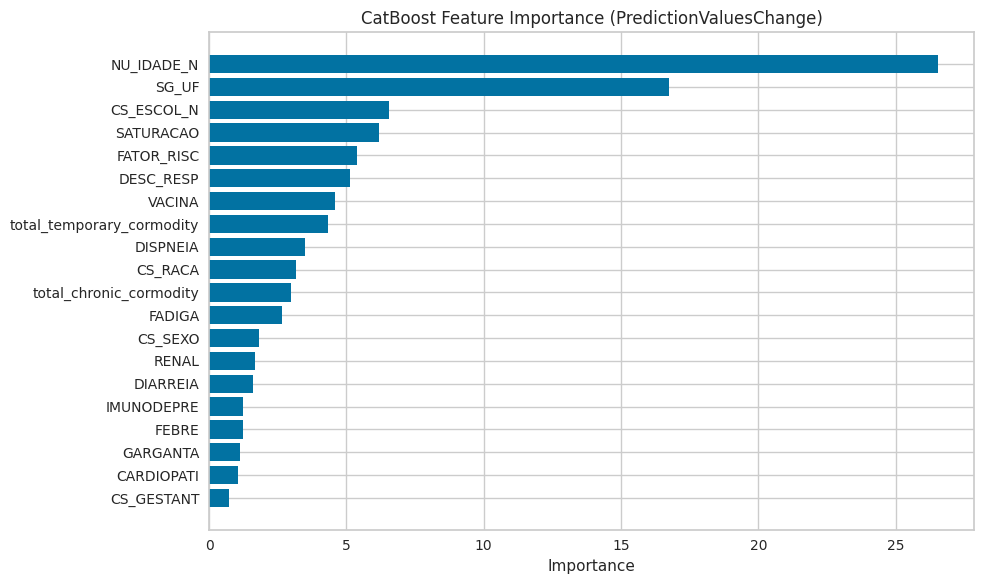


Top 25 Features:
1. NU_IDADE_N: 26.53
2. SG_UF: 16.75
3. CS_ESCOL_N: 6.56
4. SATURACAO: 6.18
5. FATOR_RISC: 5.40
6. DESC_RESP: 5.14
7. VACINA: 4.59
8. total_temporary_cormodity: 4.33
9. DISPNEIA: 3.50
10. CS_RACA: 3.18
11. total_chronic_cormodity: 2.97
12. FADIGA: 2.65
13. CS_SEXO: 1.83
14. RENAL: 1.68
15. DIARREIA: 1.61
16. IMUNODEPRE: 1.23
17. FEBRE: 1.22
18. GARGANTA: 1.11
19. CARDIOPATI: 1.04
20. CS_GESTANT: 0.74
21. PNEUMOPATI: 0.64
22. CS_ZONA: 0.64
23. OBESIDADE: 0.41
24. DIABETES: 0.09


In [51]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': ctb.get_feature_importance()
}).sort_values(by='Importance', ascending=False)

# Print top features
print("\nTop Features by Importance (PredictionValuesChange):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:20], feature_importance['Importance'][:20])
plt.xlabel('Importance')
plt.title('CatBoost Feature Importance (PredictionValuesChange)')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

# Select top 10 features
top_n = 25
top_features = feature_importance['Feature'].head(top_n).tolist()
print(f"\nTop {top_n} Features:")
for i, (feat, imp) in enumerate(feature_importance.head(top_n).itertuples(index=False), 1):
    print(f"{i}. {feat}: {imp:.2f}")

In [54]:
X_test.drop(columns={'DIABETES', 'OBESIDADE'},  inplace=True)

ctb acurracy: 74.31%

Classification report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     32493
           1       0.66      0.52      0.58     17085

    accuracy                           0.74     49578
   macro avg       0.72      0.69      0.70     49578
weighted avg       0.73      0.74      0.73     49578



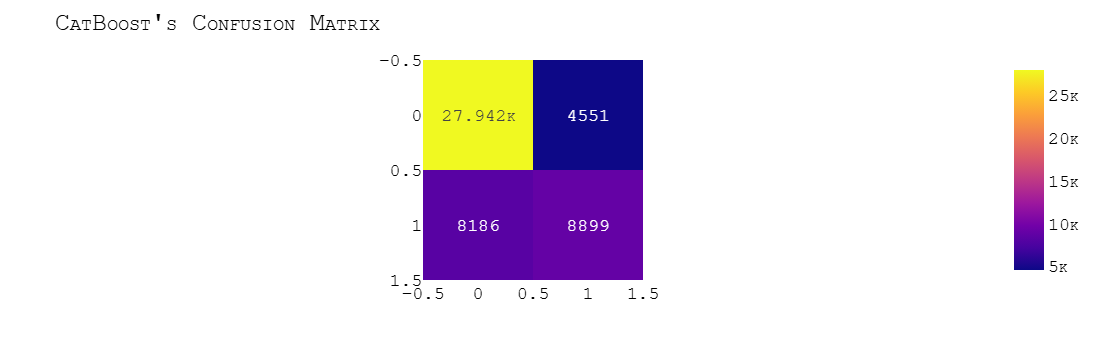

In [52]:
preds = ctb.predict(X_test)

accuracy = ctb.score(X_test, y_test)


print(f"ctb acurracy: {accuracy*100:.2f}%")
print("\nClassification report")
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "CatBoost's Confusion Matrix"}, font=my_font).show()


## Grid searching for the best params 

In [112]:
# param_grid = {
#     'depth': [4, 6, 8],               # tree depth
#     'learning_rate': [0.01, 0.03, 0.05],  # step size
#     'l2_leaf_reg': [3, 5, 7],         # regularization
#     'bagging_temperature': [0, 0.5, 1], # randomness in bagging
#     'rsm': [0.7, 0.8, 1.0]            # fraction of features per tree
# }


# ctb = CatBoostClassifier(
#     iterations=500,
#     loss_function='Logloss',
#     eval_metric='TotalF1',
#     cat_features=cat_features,
#     verbose=0
# )

# randomized_search_result  = ctb.randomized_search(
#     param_grid,
#     X = X,
#     y= y,
#     plot=True
# )

# # rand_search.fit(X_train, y_train)
# # print("Best params:", rand_search.best_params_)

## Cross-validating the model

In [113]:
# pool = Pool(data=X, label=y, cat_features=cat_features)

# cv_results = cv(
#     pool=pool,
#     params=params,
#     fold_count=5,               # number of folds
#     shuffle=True,               # shuffle data before splitting
#     partition_random_seed=42,   # reproducibility
#     early_stopping_rounds=50,   # stop if no improvement
#     verbose_eval=50
# )

# best_iter = cv_results['test-TotalF1-mean'].idxmax()
# print("Best iteration:", best_iter)
# print("Best CV F1:", cv_results['test-TotalF1-mean'].max())

In [114]:
# interaction_matrix = model.get_feature_importance(data=train_pool, type='FeatureImportance')
# # feature_names = X_train.columns


# # interaction_df = pd.DataFrame(interaction_matrix, index=X_train.columns, columns=X_train.columns)
# # print(interaction_df)
# interaction_matrix

In [115]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc
# from catboost.utils import get_roc_curve, select_threshold

# y_pred_proba = ctb.predict_proba(X_test)[:, 1] 
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
# roc_auc = auc(fpr, tpr)
# # Plot the ROC curve
# plt.figure()  
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Breast Cancer Classification')
# plt.legend()
# plt.show()

# catboost_pool = Pool(X_train, y_train, cat_features=cat_features)



# roc_curve_values = get_roc_curve(ctb, catboost_pool)

# boundary = select_threshold(ctb,
#                             curve=roc_curve_values,
#                             FPR=0.01)

# print("Boundary:",boundary)

In [25]:
df_test_copy['total_chronic_cormodity'] = ((df_test_copy[["OBESIDADE", 
                                                        "RENAL", 
                                                        "CARDIOPATI",
                                                        "IMUNODEPRE", 
                                                        "DIABETES", 
                                                        "PNEUMOPATI",
                                                        "HEPATICA",
                                                        "SIND_DOWN"]] == 1.0).sum(axis=1))

df_test_copy['total_temporary_cormodity'] = (df_test_copy[["FEBRE",
                                                       # "TOSSE",
                                                        "PUERPERA",
                                                        "GARGANTA",
                                                        "DESC_RESP",
                                                        "DIARREIA",
                                                        "VOMITO",
                                                        "FADIGA",
                                                        "SATURACAO",
                                                        "DISPNEIA"]]== 1.0).sum(axis=1)

In [30]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols_x = df_test_copy.select_dtypes(include=["object", "category"]).columns
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
encoded_df_test_copy = df_test_copy.copy()
encoded_df_test_copy[cat_cols_x] = encoder.fit_transform(encoded_df_test_copy[cat_cols_x])

In [41]:
test_pred = stack.predict_proba(encoded_df_test_copy)[:,1]
test_pred

array([0.99140247, 0.88598886, 0.4262491 , ..., 0.03085365, 0.99250949,
       0.96020084])

In [34]:
pd.DataFrame(np.round(test_pred)).reset_index().to_csv('results/stack.csv', header=['ID', 'EVOLUCAO'], index=False)

In [130]:
df_test_copy.head()

,CS_SEXO,CS_ZONA,NU_IDADE_N,CS_ESCOL_N,CS_RACA,SG_UF,CS_GESTANT,PUERPERA,DIABETES,PNEUMOPATI,...,GARGANTA,DESC_RESP,DIARREIA,VOMITO,FADIGA,SATURACAO,DISPNEIA,VACINA,total_chronic_cormodity,total_temporary_cormodity
0,F,1,60,9,2,RJ,5,2,2,1,...,2,1,2,2,9,1,1,9,0,0
1,M,1,28,9,9,RJ,6,9,9,9,...,9,9,9,9,9,1,9,9,0,0
2,M,1,45,9,4,SP,6,9,9,9,...,2,1,2,2,9,1,1,2,0,0
3,M,1,38,1,1,SC,6,2,2,1,...,2,1,2,2,2,1,1,1,0,0
4,F,1,50,9,9,RJ,6,9,9,9,...,2,2,1,2,2,2,2,9,0,0
